# Project 3 - Web APIs & NLP
*By: Despina Matos*

# Part Two: EDA, Preprocessing, and Modeling

In our pervious notebook called Part One, we were able to collect and clean the data. We collected two datasets from two different subreddits and then cleaned our dataframes so we can use it in this notebook called Part two.

## Contents: 
- [Libraries](#Libraries)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    - [Load in Datasets](#Load-in-Datasets)
        - [Summary Statistics](#Summary-Statistics)
        - [Outcomes from Summary Statistics](#Outcomes-from-Summary-Statistics)
    - [Frequently Occurring Words](#Frequently-Occurring-Words)
        - [Single Gram Words Visualizations](#Single-Gram-Words-Visualizations) 
        - [Bigram Words Visualizations](#Bigram-Words-Visualizations)
    - [Outliers](#Outliers)
- [Preprocessing](#Preprocessing)
    - [Merge Datasets](#Merge-Datasets)
        - [Mapping the y Variable](#Mapping-the-y-Variable)
        - [Saved Combined Dataset](#Saved-Combined-Dataset)
    - [NLP Preprocessing](#NLP-Preprocessing)
        - [Lemmatization](#Lemmatization)
        - [Stemming](#Stemming)
        - [Stopwords](#Stopwords)
        - [Outcomes from NLP Preprocessing](#Outcomes-from-NLP-Preprocessing)
    - [Creating X feature and y](#Creating-X-feature-and-y)
    - [Train-test Split](#Train-test-Split)
    - [Determing the Baseline Score](#Determing-the-Baseline-Score)
- [Modeling](#Modeling)
    - [Logistic Regression Model](#Logistic-Regression-Model)
        - [LR: Confusion Matrix](#LR:-Confusion-Matrix)
        - [LR: Interpretation](#LR:-Interpretation)
    - [Bernoulli NB Model](#Bernoulli-NB-Model)
       - [NB: Confusion Matrix](#NB-Confusion-Matrix)
       - [NB: Interpretation](#NB:-Interpretation)
    - [Bagged Decision Tree](#Bagged-Decision-Tree)
        - [BDT: Confusion Matrix](#BDT-Confusion-Matrix)
        - [BDT: Interpretation](#BDT:-Interpretation)
    - [Random Forest Model](#Random-Forest-Model)
       - [RF: Confusion Matrix](#Confusion-Matrix)
       - [RF: Interpretation](#RF:-Interpretation)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

## Libraries

In [1]:
#working in the dataframes 
import pandas as pd
import numpy as np

#graphing 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#using nlp 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords 

#modeling
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

#interpretation on the models 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

## Exploratory Data Analysis

Importing our clean dataframes, we can now explore our data further. First, we will want to get summary statistics for each dataframe. Then we will want to determine the frequently occuring words for each dataframe. Finally, determine the outliers in each of the dataframes.

### Load in Datasets

Let's load in the data.

*Subreddit 1: Books*

In [2]:
#Read in the data
subreddit_1 = pd.read_csv('../datasets/subreddit1.csv')
#Check to see if it worked
subreddit_1.head()

,title,author,selftext,subreddit
0,Book Suggestions for my husband and I to read ...,spiritofthesquirrels,My husband and I have decided to start and fin...,books
1,The one where Friends spoils Little Women,ladydadas-nightmare,"I just started reading 'Little Women', and was...",books
2,"The must-read works of the late, great Jim Har...",allahu_adamsmith,NaN,books
3,Margaret Atwood to publish first collection of...,shabuluba,NaN,books
4,One Man’s Impossible Quest to Read—and Review—...,pearloz,NaN,books


Our subreddit 1 data was loaded in successfully.

*Subreddit 2: Movies*

In [3]:
#Read in the data
subreddit_2 = pd.read_csv('../datasets/subreddit2.csv')
#Check to see if it worked
subreddit_2.head()

,title,author,selftext,subreddit
0,Gold Jewellery Manufacturer in Jaipur,topstenclub,NaN,movies
1,"looking for a movie similar to Stay alive, wit...",harunamika,Hello i am looking a movie similar to the movi...,movies
2,2019 movies that hit you most emotionally?,funnypilgo,What movies made you cry or nearly made you bu...,movies
3,"Where can I watch Salò, or the 120 Days of Sod...",westoffensive,[removed],movies
4,"Contagion: From Simple Cough, to Global Pandemic",GoldenJoel,NaN,movies


Our subreddit 2 data was loaded in successfully as well.

#### Summary Statistics

In general, summary statistics will provide information about our two dataframes. We will use the info and describe methods from the Pandas library to get our information. 

*Subreddit 1: Books*

**Using the info method**

In [4]:
#Checking the info for subreddit 1
subreddit_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 4 columns):
title        492 non-null object
author       492 non-null object
selftext     400 non-null object
subreddit    492 non-null object
dtypes: object(4)
memory usage: 15.5+ KB


Looking at the subreddit 1 dataset, there are 492 entries and all of the datatypes are in object form. Also, there is missing data in selftext feature. We will have to determine what to do with this feature later on.

**Using the describe method**

In [5]:
#checking the stats for subreddit 1
subreddit_1.describe().T

,count,unique,top,freq
title,492,488,Barnes &amp; Noble Leatherbound Classic Collec...,2
author,492,422,weightlossfitnss,15
selftext,400,269,[removed],132
subreddit,492,1,books,492


Looking at the subreddit 1 dataset, the dataset seems ordinary. We also noticed that the dataset has 2 titles that are similar, 15 posts were from a User called weightlossfitnss, and there is 132 removed content. We will need to explore further with visualizations to fully determine the irregulars in this dataset.  

*Subreddit 2: Movies*

**Using the info method**

In [6]:
#Checking the info for subreddit 2
subreddit_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 475 entries, 0 to 474
Data columns (total 4 columns):
title        475 non-null object
author       475 non-null object
selftext     194 non-null object
subreddit    475 non-null object
dtypes: object(4)
memory usage: 15.0+ KB


Looking at the subreddit 2 dataset, there are 475 entries and also all of the datatypes are in object form. There is also missing data in selftext feature as like subreddit 1. We will have to determine what to do with this feature as well later on.

**Using the describe method**

In [7]:
#checking the stats for subreddit 2
subreddit_2.describe().T

,count,unique,top,freq
title,475,437,Opie Cunningham and Netflix team up to make Hi...,4
author,475,272,topstenclub,68
selftext,194,82,[removed],113
subreddit,475,1,movies,475


Looking at the subreddit 2 dataset, the dataset seems ordinary. We also noticed that the dataset has 4 titles that are similar, 68 posts were from a User called topstenclub, and there is 113 removed content. We will also need to explore further with visualizations to fully determine the irregulars in this dataset as well.

After sorting through the statistics, we determined that we will not use the selftext feature because many of these posts consist of not-text data. We will not be able to use this data when modeling classification. So lets drop the selftext feature in both of our datasets.

#### Outcomes from Summary Statistics

*Subreddit 1: Books*

In [8]:
#dropping the selftext feature 
subreddit_1.drop(['selftext'], axis = 1, inplace = True)

Lets check the shape to see if it worked.

In [9]:
#checking the shape 
subreddit_1.shape

(492, 3)

Our subreddit 1 has successfully drop the selftext feature.

*Subreddit 2: Movies*

In [10]:
#dropping the selftext feature 
subreddit_2.drop(['selftext'], axis = 1, inplace = True)

Lets check the shape to see if it worked.

In [11]:
#checking the shape 
subreddit_2.shape

(475, 3)

Our subreddit 2 has successfully drop the selftext feature.

Finally, lets look at our datasets features.

In [12]:
#checking the features in subreddit 1
subreddit_1.columns

Index(['title', 'author', 'subreddit'], dtype='object')

In [13]:
#checking the features in subreddit 2
subreddit_2.columns

Index(['title', 'author', 'subreddit'], dtype='object')

Both of the datasets have only three fetaures: title, author, and subreddit. 

If we *recall* our problem statement, we are trying to find content that are similar to two web sources. Based off the features we have left, we should only focus our model on the title feature because it has the largest content we can observe out of all the features. With this in mind, we will also want the title feature because it will help us in using Natural Language Processing (NLP) to train our classification model. Therefore, in the next section, we will investigate the use of NLP in our data science process.

We will start with finding the frequently occurring words in each of our datasets because in effect, we want to see if these words have similar content in both of the datasets.

### Frequently Occurring Words

Natural Language Processing (NLP) describes the field of getting computers to understand human language. In other words, we will be using the title feature with NLP because we will want the computer to understand how to sort, filter, and examine frequently occuring words in both of our datasets. 


We will begin with using the lemmatize function to get an accurate set of words. Then, we will use CountVectorizer from the sklearn library. CountVectorizer is the easiest way for us to convert text data into a structured, numeric X dataframe. We are going to use CountVectorizer because it only looks at pure counts. The pure counts here are the "frequently" words in each dataset. Then, we will create a visualization of these similar words and explain our insights based off the visualizations.   

Lets create a function to find the most frequently single gram words use in each dataframe.

In [14]:
#lets create a function to find the frequently words
def word_counter(df):
    
    #Getting our text data in our dataframe and use the copy function so we will not miss up our dataframe
    token = df.copy()
    
    #Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')

    #Run tokenizer, use join method to get our post to become lowercase
    #Created with Noah C. 
    tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]
    
    #Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    #use the split method to split our posts and lemmatize individual words in each post 
    #Created with Noah C. 
    tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

    #lemmatize tokens, use the join method to get our post to become lemmatize
    #Created with Noah C.
    lem_tokens = [" ".join(post) for post in tokens_lem]
    
    #replace our text data with new lemmatize data
    df = lem_tokens
    
    #Instantiate a CountVectorizer
    cvec = CountVectorizer(stop_words = 'english')
    #using the stop words parameter & setting it to english to eliminate a group of words
    
    #fit the vectorizer on our corpus
    cvec.fit(df)
    
    #transform the corpus
    title = cvec.transform(df)
    
    #convert df into a dataframe
    df = pd.DataFrame(title.toarray(), #able to have strings into floats
                          columns = cvec.get_feature_names()) #get feature row names

    #Word counts 
    counts = df.sum().sort_values(ascending=False)
    
    return counts

Lets implement this function on our two dataframes.

*Subreddit 1: Books*

In [15]:
word_counter(subreddit_1['title'])

book          195
read           67
reading        36
just           28
help           22
             ... 
nurture         1
nutritious      1
ny              1
nyc             1
abai            1
Length: 1371, dtype: int64

*Subreddit 2: Movies*

In [16]:
word_counter(subreddit_2['title'])

movie        153
film          37
wa            27
time          26
best          23
            ... 
non            1
norovirus      1
nostalgic      1
nother         1
aaa            1
Length: 1650, dtype: int64

Next, lets look at this visually to understand it better, lets pick the top 20 words.

#### Single Gram Words Visualizations

*Subreddit 1: Books*

In [17]:
#create a new dataframe for wordcount
books_wordcount = pd.DataFrame(data = word_counter(subreddit_1['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [18]:
#creating a top20 variable from our dataframe
books_wordcount_top20 = books_wordcount.head(20)

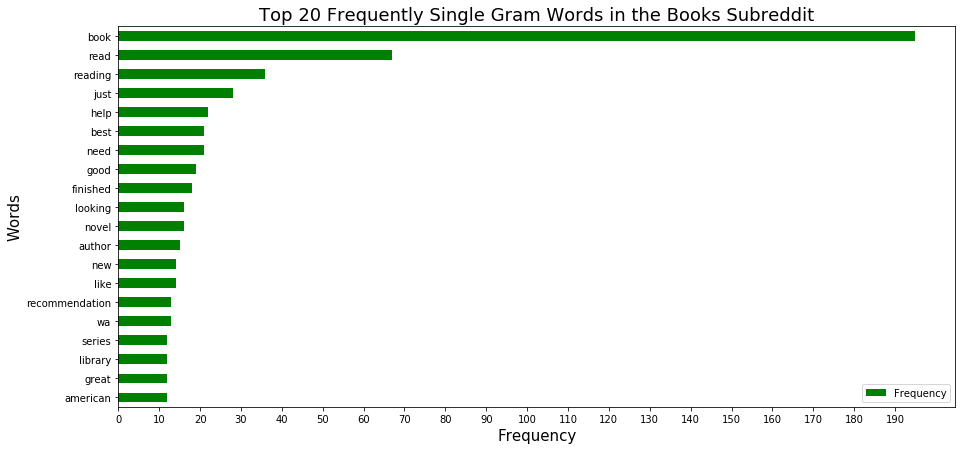

In [19]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
books_wordcount_top20.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 200, step = 10))#change the ticks on the x-axis

plt.title("Top 20 Frequently Single Gram Words in the Books Subreddit", fontsize = 18); #title

We observed that the single gram words in subreddit 1 are spread out in the frequency scale.

Additionally, lets create a table to clearly show what is happening.

In [20]:
#looking at the top20 
books_wordcount_top20

,Frequency
book,195
read,67
reading,36
just,28
help,22
best,21
need,21
good,19
finished,18
looking,16


**INSIGHTS:** We were able to concluded that 'book' is the most occurring single gram word. That is a vaild statement because subreddit 1 is all about that. In general, all of these words are what subreddit 1 is about. Also, it is interesting that the word 'wa' is up there. Maybe it is a typo. But, it is mostly likely how the word was lemmatized. In the event of that, maybe this dilemma will alter our models.

*Subreddit 2: Movies*

In [21]:
#create a new dataframe for wordcount
movies_wordcount = pd.DataFrame(data = word_counter(subreddit_2['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [22]:
#creating a top20 variable from our dataframe
movies_wordcount_top20 = movies_wordcount.head(20)

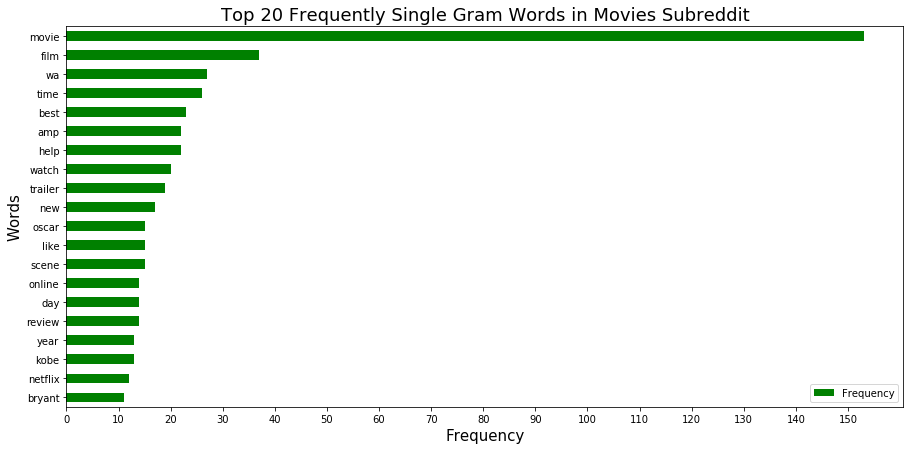

In [23]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
movies_wordcount_top20.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 155, step = 10))#change the ticks on the x-axis

plt.title("Top 20 Frequently Single Gram Words in Movies Subreddit", fontsize = 18); #title

We also observed that the single gram words in subreddit 2 are spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [24]:
#looking at the top20 
movies_wordcount_top20

,Frequency
movie,153
film,37
wa,27
time,26
best,23
amp,22
help,22
watch,20
trailer,19
new,17


**INSIGHTS:** We were able to concluded that 'movie' is the most occurring single gram word. That is a vaild statement because subreddit 2 is all about that. In general, all of these words are what subreddit 2 is about. Also, it is interesting that the word 'wa' is up there as well as subreddit 1. Yet, there is another typo up there 'amp' and that might sway our model results. 

So, we were able to look at the top 20 frequently use single gram words for each dataframe, *yet!*, lets look further to get more evidence of the connection between both subreddits. So lets try looking at bigram words.

Lets create a function to find the most frequently bigram words use in each dataframe.

In [25]:
#lets create a function to find the similar words
def word_counter_two(df):
    
    #Getting our text data in our dataframe and use the copy function so we will not miss up our dataframe
    token = df.copy()
    
    #Instantiate tokenizer
    tokenizer = RegexpTokenizer(r'[A-z]+')

    #Run tokenizer, use join method to get our post to become lowercase
    #Created with Noah C. 
    tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]
    
    #Instantiate lemmatizer
    lemmatizer = WordNetLemmatizer()

    #use the split method to split our posts and lemmatize individual words in each post 
    #Created with Noah C. 
    tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

    #lemmatize tokens, use the join method to get our post to become lemmatize
    #Created with Noah C.
    lem_tokens = [" ".join(post) for post in tokens_lem]
    
    #replace our text data with new lemmatize data
    df = lem_tokens
    
    #Instantiate a CountVectorizer
    cvec = CountVectorizer(stop_words = 'english',
                            ngram_range = (2,2))#getting bigram words
    #using the stop words parameter & setting it to english to eliminate a group of words
    
    #fit the vectorizer on our corpus
    cvec.fit(df)
    
    #transform the corpus
    title = cvec.transform(df)
    
    #convert df into a dataframe
    df = pd.DataFrame(title.toarray(), #able to have strings into floats
                          columns = cvec.get_feature_names()) #get feature row names

    #Word counts 
    counts = df.sum().sort_values(ascending=False)
    
    return counts

Lets implement this function on our two dataframes.

In [26]:
word_counter_two(subreddit_1['title'])

just finished          15
book read              12
best book               8
book ve                 7
book recommendation     6
                       ..
petition sub            1
philosophy best         1
philosophy mind         1
pick book               1
abbe faria              1
Length: 1983, dtype: int64

In [27]:
word_counter_two(subreddit_2['title'])

kobe bryant         11
help finding         8
favorite movie       6
official trailer     6
dear basketball      6
                    ..
pick benedict        1
picked grammy        1
picture category     1
picture ha           1
aaa title            1
Length: 2242, dtype: int64

Next, lets also look at this visually to understand it better, lets pick the 20 as before.

#### Bigram Words Visualizations

*Subreddit 1: Books*

In [28]:
#create a new dataframe for wordcount
books_wordcount_two = pd.DataFrame(data = word_counter_two(subreddit_1['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [29]:
#creating a top20 variable from our dataframe
books_wordcount_top20_two = books_wordcount_two.head(20)

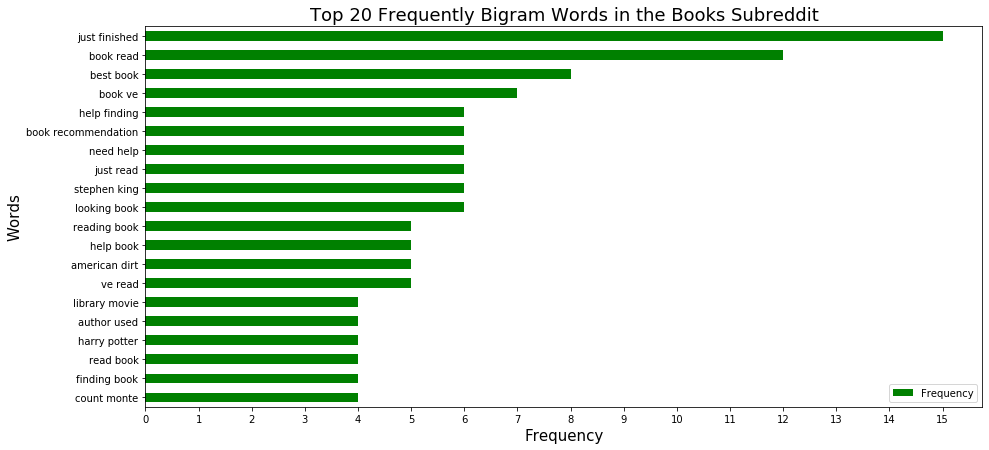

In [30]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
books_wordcount_top20_two.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 16, step = 1))#change the ticks on the x-axis

plt.title("Top 20 Frequently Bigram Words in the Books Subreddit", fontsize = 18); #title

We observed that the bigram words in subreddit 1 are also spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [31]:
#looking at the top20 
books_wordcount_top20_two

,Frequency
just finished,15
book read,12
best book,8
book ve,7
book recommendation,6
need help,6
just read,6
stephen king,6
help finding,6
looking book,6


**INSIGHTS:** We were able to concluded that 'just finished' was the most occurring bigram word. In general, again all of these words are what subreddit 1 is about. Also, it is interesting that there are more typos with the word 've' here. 

*Subreddit 2: Movies*

In [32]:
#create a new dataframe for wordcount
movies_wordcount_two = pd.DataFrame(data = word_counter_two(subreddit_2['title']),#using the function above
                               columns = ["Frequency"]) #calling the column frequency

In [33]:
#creating a top20 variable from our dataframe
movies_wordcount_top20_two = movies_wordcount_two.head(20)

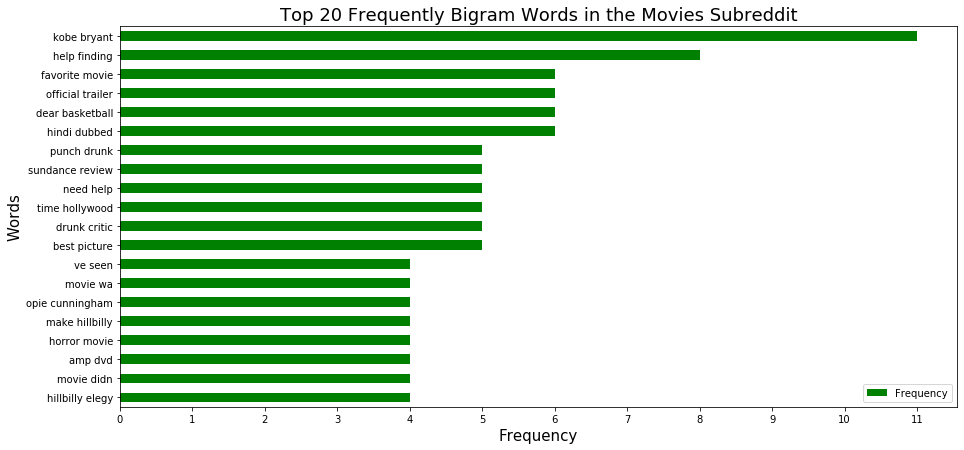

In [34]:
#creating a barh graph for the wordcount dataframe 

#create a barh of our data
movies_wordcount_top20_two.sort_values(by = 'Frequency', #by the fequency column
                                  ascending = True).plot(kind = 'barh', #barh type
                                                         color = 'green', #color
                                                         figsize = (15,7))#graph size

plt.xlabel('Frequency', fontsize = 15)#xlabel on graph
plt.ylabel('Words', fontsize = 15)#ylabel on graph 
plt.xticks(np.arange(0, 12, step = 1))#change the ticks on the x-axis

plt.title("Top 20 Frequently Bigram Words in the Movies Subreddit", fontsize = 18); #title

We also observed that the bigram words in subreddit 2 are spread out in the frequency scale.

Additionally, lets also create a table to clearly show what is happening.

In [35]:
#looking at the top20 
movies_wordcount_top20_two

,Frequency
kobe bryant,11
help finding,8
favorite movie,6
official trailer,6
dear basketball,6
hindi dubbed,6
sundance review,5
need help,5
punch drunk,5
time hollywood,5


**INSIGHTS:** We were also able to concluded that 'kobe bryant' is the most occurring bigram word. In general, again all of these words are what subreddit 2 is about. Also, it is interesting that there are more typos with the words 'wa', 'amp', and 've' here.

*So what was our results?* We do have some similar content when we use both single gram and bigram words. For instance, both dataframes explicitly have 'need help' and 'help finding' as occuring words in the data. However, both dataframes also implicitly have similar words. For example, 'library movies' and 'favorite movie' are similar because 'movies' are in both. Given that information, we can look for more similarities in both of our subreddit posts if we explore more NLP functions. We will explore this later on.

Finally, lets look at the outliers in our datasets before we model our data. 

### Outliers

We will determine an outlier as the text that our model cannot compute. This includes words from different languages besides English and emojis. Lets look at both of our datasets to determine where we will drop the outliers.

*Subreddit 1: Books*

In [36]:
#determing where the outliers are by using sort values in subreddit 1
subreddit_1.sort_values(by = 'title', ascending = False).head(5)

,title,author,subreddit
404,🙏🏽,OUSSBEATS,books
252,【歯型模型 3Dデータ化】歯科技工所にて、歯型模型を3Dにスキャニングする 青山一丁目の歯科...,nakamurabrown,books
243,【口腔内スキャナー ３Ｄプリンター】口腔内スキャナーによる診断と、３Ｄプリンターによる歯の模...,nakamurabrown,books
245,【ジルコニア セラミック 審美歯科】 審美歯科に不可欠なジルコニア 歯を機械で削り出す 青山...,nakamurabrown,books
291,"“For me, reading stimulates all the senses. I ...",suckersalty,books


We learned that there are four outliers. We will now drop these rows.

In [37]:
#dropping the outlier 1
subreddit_1.drop(index = [404], inplace = True)

In [38]:
#dropping the outlier 2
subreddit_1.drop(index = [252], inplace = True)

In [39]:
#dropping the outlier 3
subreddit_1.drop(index = [243], inplace = True)

In [40]:
#dropping the outlier 4
subreddit_1.drop(index = [245], inplace = True)

**Yet!** Looking through the whole dataset using [Pandas display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html), we were able to identify six more rows to drop. 

In [41]:
#looking for row
print(subreddit_1.loc[51])
print('---')
print(subreddit_1.loc[85])
print('---')
print(subreddit_1.loc[181])
print('---')
print(subreddit_1.loc[225])
print('---')
print(subreddit_1.loc[304])
print('---')
print(subreddit_1.loc[481])

title        کتاب هایی که قبل از مرگ باید بخوانید - موسسه ا...
author                                               shahreseo
subreddit                                                books
Name: 51, dtype: object
---
title        Bogus /ˈbəʊɡəs/
author           rahulroy510
subreddit              books
Name: 85, dtype: object
---
title        كايرو جيت الشيخ زايد اعمار مصر | 01009547123 |...
author                                                mostshrk
subreddit                                                books
Name: 181, dtype: object
---
title        YA suggestions?❤️
author                    slm4
subreddit                books
Name: 225, dtype: object
---
title        Ummmm, who wants to be the one to tell them? 🤭
author                                         paranoid_365
subreddit                                             books
Name: 304, dtype: object
---
title        Ramanichandran tamil novel|சொர்க்கத்திலே முடிவ...
author                                             ramya

Lets drop these rows.

In [42]:
#dropping the outlier 5
subreddit_1.drop(index = [51], inplace = True)

In [43]:
#dropping the outlier 6
subreddit_1.drop(index = [85], inplace = True)

In [44]:
#dropping the outlier 7
subreddit_1.drop(index = [181], inplace = True)

In [45]:
#dropping the outlier 8
subreddit_1.drop(index = [225], inplace = True)

In [46]:
#dropping the outlier 9
subreddit_1.drop(index = [304], inplace = True)

In [47]:
#dropping the outlier 10
subreddit_1.drop(index = [481], inplace = True)

Now lets check the shape of our dataframe.

In [48]:
#check the shape
subreddit_1.shape

(482, 3)

All of the outliers have been dropped in subreddit 1 because we had 492 rows before.

*Subreddit 2: Moviess*

In [49]:
#determing where the outliers are by using sort values in subreddit 2
subreddit_2.sort_values(by = 'title', ascending = False).head(5)

,title,author,subreddit
192,🔥커플 다른그림을 찾아라! spot the difference Couple,PICTUREPUZZLE1,movies
327,“Us”,JackkkTaylorrr,movies
336,“Twenty Twenty-Four” (2016) - Wha-a-a?,JustOneTamal,movies
70,‘Wendy’ Review: Behn Zeitlin’s Vibrant ‘Peter ...,Onesimplywill,movies
334,‘Uncut Gems’ Directors Almost Cast Kobe Bryant...,TheSonsofBatman,movies


We learned that there is one outlier. We will now drop this row.

In [50]:
#dropping the outlier 1
subreddit_2.drop(index = [192], inplace = True)

**Yet!** Looking through the whole dataset using [Pandas display](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html), we were able to identify four more rows to drop.

In [51]:
#looking for row
print(subreddit_2.loc[47])
print('---')
print(subreddit_2.loc[85])
print('---')
print(subreddit_2.loc[87])
print('---')
print(subreddit_2.loc[457])

title        Разбивающая сердца / Heartbeat Сериал (2016) с...
author                                               LUBIMCHIK
subreddit                                               movies
Name: 47, dtype: object
---
title        Удивительные Люди, Умные Навыки и Супер Способ...
author                                               Sterligov
subreddit                                               movies
Name: 85, dtype: object
---
title        बेस्ट बैलेंस्ड फंड्स- Best Balanced Fund 2018-...
author                                             topstenclub
subreddit                                               movies
Name: 87, dtype: object
---
title        Then this happened 😲
author                     op4321
subreddit                  movies
Name: 457, dtype: object


Lets drop these rows.

In [52]:
#dropping the outlier 5
subreddit_2.drop(index = [47], inplace = True)

In [53]:
#dropping the outlier 6
subreddit_2.drop(index = [85], inplace = True)

In [54]:
#dropping the outlier 7
subreddit_2.drop(index = [87], inplace = True)

In [55]:
#dropping the outlier 8
subreddit_2.drop(index = [457], inplace = True)

Lets check the shape of our dataframe.

In [56]:
#check the shape
subreddit_2.shape

(470, 3)

All of the outliers also have been dropped in subreddit 2 because we had 475 before.

In both of our datasets, we now have our outliers dropped. In sum, looking through our EDA, we were able to determine that we can move onto modeling. Yet, we will need to do some preprocessing first!

## Preprocessing

Before we start modeling, we will need to do some preparation. We first need to mergre both of our datasets together. Then, we need to do addtional NLP prepocessing on our merged dataset to detemine if we want to use it in our modeling. Then, we can create our X feature and y. Then, we should detemine the baseline. Lastly, do our train-test split on our X fetaure and y. 

### Merge Datasets

To build our model, we will need to merge our two datasets together to have one final dataset. We will only use the title and subreddit features because our author feature does not have enough content. As a result, our title feature will be our X fetaure and the subreddit feature will be our y target variable. 

Lets drop the author feature before we megre our datasets. Then, map our subreddit feature to a binary classifier. Lastly, we should save our clean dataset for future use. 

*Subreddit 1: Books*

In [57]:
#dropping the author feature in subreddit 1
subreddit_1.drop(['author'], axis = 1, inplace = True)

In [58]:
#check the shape
subreddit_1.shape

(482, 2)

We had successfully drop the author feature in subreddit 1.

*Subreddit 2: Books*

In [59]:
#dropping the author feature in subreddit 2
subreddit_2.drop(['author'], axis = 1, inplace = True)

In [60]:
#check the shape
subreddit_2.shape

(470, 2)

We had successfully drop the author feature in subreddit 2.

Lets merge our datasets

In [61]:
#Merge datasets together 
subreddits_titles = pd.concat([subreddit_1, subreddit_2], ignore_index = True)

In [62]:
#making sure it worked
subreddits_titles['subreddit'].value_counts()

books     482
movies    470
Name: subreddit, dtype: int64

In [63]:
#check the shape
subreddits_titles.shape

(952, 2)

In [64]:
#lets see it visually
subreddits_titles.head()

,title,subreddit
0,Book Suggestions for my husband and I to read ...,books
1,The one where Friends spoils Little Women,books
2,"The must-read works of the late, great Jim Har...",books
3,Margaret Atwood to publish first collection of...,books
4,One Man’s Impossible Quest to Read—and Review—...,books


We successfully merged our datasets together. Next, lets map our target variable. 

#### Mapping the y Variable

We need to change our target variable to a binary classifier because we need to be able to model it as a classification model. 

In [65]:
#Using the replace method to fix target values in the subreddits_titles data set
subreddits_titles['subreddit'].replace({'books': 1, 'movies': 0}, inplace = True)

In [66]:
#making sure it worked
subreddits_titles['subreddit'].value_counts()

1    482
0    470
Name: subreddit, dtype: int64

Our target variable has been successfully changed.

Lastly, lets store our clean final dataset.

#### Saved Combined Dataset

In [67]:
#Here is what we will like to save it as
#index = false for no index column
subreddits_titles.to_csv('../datasets/subreddits_titles.csv', index = False)

Now that we should do some more NLP preprocessing to determine if we want to use it in our model.

### NLP Preprocessing

When dealing with text data, there are common pre-processing steps. We will tokenize, lemmatize, and stem. We will also use stopwords to clean up our text data. Finally, we can use two of these functions and use the results to model. We will either pick lemmatization and stopwords or stemming and stopwords.

Lets create our text data and call it token.

In [68]:
#getting our text data and using the copy method to unchange our dataframe feature 
token = subreddits_titles['title'].copy()

#### Lemmatization

When we lemmatize our text data, we take words in the data and attempt to return their base form of that word. Before we lemmatize, we need to tokenize our data. In other words, we will split up our data into distinct chunks based on a pattern of our choosing. 

In [69]:
#Instantiate tokenizer
tokenizer = RegexpTokenizer(r'[A-z]+') #using the [A-z] pattern

In [70]:
#Run tokenizer, use join method to get our post to become lowercase
#Created with Noah C. 
tokens = [" ".join(tokenizer.tokenize(post.lower())) for post in token]

In [71]:
#see if it worked
tokens[:2]

['book suggestions for my husband and i to read together in month',
 'the one where friends spoils little women']

Now we can use lemmatization. 

In [72]:
#Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

In [73]:
#use the split method to split our posts and lemmatize individual words in each post 
#Created with Noah C. 
tokens_lem = [[lemmatizer.lemmatize(word) for word in post.split(' ')] for post in tokens]

In [74]:
#to see the differences between tokens and lemmatize tokens 
list(zip(tokens, tokens_lem))[:2]

[('book suggestions for my husband and i to read together in month',
  ['book',
   'suggestion',
   'for',
   'my',
   'husband',
   'and',
   'i',
   'to',
   'read',
   'together',
   'in',
   'month']),
 ('the one where friends spoils little women',
  ['the', 'one', 'where', 'friend', 'spoil', 'little', 'woman'])]

In [75]:
#lemmatize tokens, use the join method to get our post to become lemmatize
#Created with Noah C.
lem_tokens = [" ".join(post) for post in tokens_lem]

Next, we use CountVectorizer to transform the lists of the cleaned posts into features that we can pass into a model.

In [76]:
#Instantiate CountVectorizer
cvec = CountVectorizer()

In [77]:
#fit lemmatize features 
cvec.fit_transform(lem_tokens);

In [78]:
#Get feature names
vocab_lemma = cvec.get_feature_names()

In [79]:
#create a new dataframe with our data lemmatize
vocab_lemma_df = pd.DataFrame(vocab_lemma)

In [80]:
#checking to see if it worked 
vocab_lemma_df.head()

,0
0,aaa
1,aamir
2,abai
3,abbe
4,able


We were able to lemmatize our X feature. Next, we can stem X feature and it is very similar to lemmatization, but, it is a bit cruder.  

#### Stemming

Again, when we stem our text data, we take words in the data and attempt to return their base form of that word. Also, before we stem, we need to tokenize our data. 

In [81]:
#Instantiate object of class PorterStemmer.
p_stemmer = PorterStemmer()

In [82]:
#Stem tokens, use the split method to split our posts and stem individual words in each post 
#Created with Noah C.
tokens_stem = [[p_stemmer.stem(word) for word in post.split(' ')] for post in tokens]

In [83]:
#show the differences between tokens and stemmed tokens 
list(zip(tokens, tokens_stem))[:2]

[('book suggestions for my husband and i to read together in month',
  ['book',
   'suggest',
   'for',
   'my',
   'husband',
   'and',
   'i',
   'to',
   'read',
   'togeth',
   'in',
   'month']),
 ('the one where friends spoils little women',
  ['the', 'one', 'where', 'friend', 'spoil', 'littl', 'women'])]

In [84]:
#stemmed tokens, use the join method to get our post to become stemmed
#Created with Noah C.
stemmed_tokens = [" ".join(post) for post in tokens_stem]

Again, we can also CountVectorizer.

In [85]:
#Instantiate CountVectorizer
cvec = CountVectorizer()

In [86]:
#fit stem features 
cvec.fit_transform(stemmed_tokens);

In [87]:
#Get feature names
vocab_stemmed = cvec.get_feature_names()

In [88]:
#create a new dataframe with our data lemmatize
vocab_stemmed_df = pd.DataFrame(vocab_stemmed)

In [89]:
#check to see if it worked 
vocab_stemmed_df.head()

,0
0,aaa
1,aamir
2,abai
3,abb
4,abl


We were able to stem our X feature.

Thus, we observed that stemming is better than lemmatization because we are able to get the clear root word in our dataset. For instance, in lemmatization we get the word "suggestion" and in stemming we get the word "suggest". We decided to use the stemming function for our model.  

Finally, we can determine our stop words that will not be included into our model.

#### Stopwords

Stopwords are very common words that are often removed because they amount to unnecessary information and removing them can dramatically speed things up in our modeling. 
From this [source](https://stackoverflow.com/questions/33245567/stopword-removal-with-nltk-and-pandas), we were able to show our model without the stopwords. 

In [90]:
#english stopwords are the common stop words in english
stop = stopwords.words('english')

In [91]:
#lets create another copy of our dataframe so it will not effect our modeling
copy_st = subreddits_titles.copy()

In [92]:
#changing our title feature to a lower case and split the posts into indvidual words
copy_st['title'] = copy_st['title'].str.lower().str.split()  

In [93]:
#see if it worked
copy_st['title'][2]

['the', 'must-read', 'works', 'of', 'the', 'late,', 'great', 'jim', 'harrison']

In [94]:
#Checking if each word is either a stopword or not, if then drop word, if not keep word
using_stop_words = copy_st['title'].apply(lambda post: [word for word in post if word not in stop])

In [95]:
#creating a dataframe with stopwords gone
using_stop_words_df = pd.DataFrame(using_stop_words)

In [96]:
#check to see if it worked
using_stop_words_df.head()

,title
0,"[book, suggestions, husband, read, together, 1..."
1,"[one, friends, spoils, little, women]"
2,"[must-read, works, late,, great, jim, harrison]"
3,"[margaret, atwood, publish, first, collection,..."
4,"[one, man’s, impossible, quest, read—and, revi..."


We were able to determine our stopwords our X feature.

After exploring each of the NLP functions, we will use stemming and stopwords for our model. 

#### Outcomes from NLP Preprocessing

Lets create our stemmed X feature for our model.

In [97]:
#Getting our text data in our dataframe
token_model = subreddits_titles['title']

In [98]:
#Instantiate tokenizer
tokenizer_model = RegexpTokenizer(r'[A-z]+')

In [99]:
#Run tokenizer, use join method to get our post to become lowercase
#Created with Noah C. 
tokens_model = [" ".join(tokenizer_model.tokenize(post.lower())) for post in token_model]

In [100]:
#Instantiate object of class PorterStemmer.
p_stemmer_model = PorterStemmer()

In [101]:
#Stem tokens, use the split method to split our posts and stem individual words in each post 
#Created with Noah C.
tokens_stem_model = [[p_stemmer_model.stem(word) for word in post.split(' ')] for post in tokens_model]

In [102]:
#stemmed tokens, use the join method to get our post to become stemmed
#Created with Noah C.
stemmed_tokens_model = [" ".join(post) for post in tokens_stem_model]

In [103]:
#replace our text data with new stemmed data
subreddits_titles['title'] = stemmed_tokens_model

In [104]:
#check to see if it worked
subreddits_titles.head(30)

,title,subreddit
0,book suggest for my husband and i to read toge...,1
1,the one where friend spoil littl women,1
2,the must read work of the late great jim harrison,1
3,margaret atwood to publish first collect of po...,1
4,one man s imposs quest to read and review the ...,1
5,harri potter and the vanish editor,1
6,we ll be read note from the underground by dos...,1
7,anybodi have experi with the count of mont cri...,1
8,can i gush about my favorit chapbook pleas,1
9,woh baat jin se hum samajht hai ki wazu toot j...,1


We were able to create our stemmed X feature that we are going to be using in our model.

Next, lets state our X feature and target variable.

### Creating X feature and y

Create our feature matrix (X) and target vector (y):

In [105]:
X = subreddits_titles['title']
y = subreddits_titles['subreddit']

Now lets use train-test split on our X and y.

### Train-test Split

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [107]:
#check to see if it worked 
X_train.head()

482             gold jewelleri manufactur in jaipur
275    audiobook surviv by lisandra pereira prologu
80                    i just start infinit jest and
40                          weekli calendar januari
415                                i am number seri
Name: title, dtype: object

Finally, we can determine our baseline score.

### Determing the Baseline Score

The baseline score is actually an accuracy score. It is the percentage of the majority class, regardless of whether our y is 1 or 0. It will serve as the benchmark for our classification models to beat.

In [108]:
y_test.value_counts(normalize = True)

1    0.504762
0    0.495238
Name: subreddit, dtype: float64

The majority class end up being r/Books = 1 because this subreddit has more posts included in y. Therefore, our baseline accuracy is about 0.505. And each time we see a post, it is predicted to be r/Books.

Hence, we finished our preprocessing and now we can model. 

## Modeling

We are going to be modeling four different classification models to determine how accurate it is towards our problem statement with it's accuracy score. We will model: Logistic Regression, Bernoulli Naive Bayes, Bagged Decision Tree, and Random Forest. 

For Logistic Regression and Bernoulli Naive Bayes, we will use TfidfVectorizer as a transformer. TfidfVectorizer is another classification model that penalizes words in our dataset that are common across all posts in the corpus. 

We also need to determine parameters for Logistic Regression and Random Forest models. A parameter sets the conditions of its models. 

Additionally, we wil need to transform our Logistic Regression and Random Forest models to GridSearchCV model. GridSearchCV helps us tune our parameters.

Then we will supplement each model with there repected confusion matrix. Based on the confusion matrix, we will be able to determine what was correctly classified and misclassified. This is important because it determines the second half of our problem statement. In other words, we want to see if each model can correctly classify where each post came from in the dataset.

### Logistic Regression Model

Logistic regression is the most common binary classification algorithm. The goal of our logistic regression model is to describe the relationship between our binary outcome which is our target variable and an independent variable which is our X feature. 

We will begin by instantiating a pipeline with TfidfVectorizer and LogisticRegression. Then, we will determine our parameters for our pipeline. Then, we will transform our model to a GridSearchCV. Then, we will fit our training dataset. Finally, we will able to get our training and testing accuracy scores. 


For our supplemental piece, we will create a confusion matrix. 

*Instantiatie Pipeline with TfidfVectorizer() & LogisticRegression()*

In [109]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()), 
    ('lr', LogisticRegression(solver = 'liblinear', #making sure we have our slover as liblinear
                              random_state = 42))#creating the random state as 42
])

*Using the .get_params attribute, we were able to get the parameters for this pipeline*

In [110]:
#got our parameters by trial and error
pipe_params = {
    'vectorizer__max_features': [1000, 2500, 5000], #include the 𝑁 most popular vocabulary words in the corpus
    'vectorizer__ngram_range': [(1,1), (1,2)],#capture 𝑛 -word phrases
    "vectorizer__norm":         ['l1', 'l2'],#using Lasso and Ridge 
    "vectorizer__stop_words":   ['english'],#taking away the english stopwords
    'lr__penalty':              ['l1', 'l2'],#using Lasso and Ridge 
    'lr__C':                    [2.0],#Inverse of regularization strength
    
}

*Transform to GridSearchCV*

In [111]:
gs = GridSearchCV(pipe, #use the data which is pipe
                  param_grid = pipe_params, #using our custom parameters
                  cv = 5)#cv 5 times

*Fit the model*

In [112]:
gs.fit(X_train, y_train);

/Users/daisymatos25/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daisymatos25/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/daisymatos25/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


*Obtaining the best estimator and parameters*

In [113]:
print(gs.best_score_) 
gs.best_params_

0.8398744113029827


{'lr__C': 2.0,
 'lr__penalty': 'l2',
 'vectorizer__max_features': 5000,
 'vectorizer__ngram_range': (1, 2),
 'vectorizer__norm': 'l2',
 'vectorizer__stop_words': 'english'}

The best model estimator is about 0.840.

In [114]:
#Save best model as gs_model.
gs_model = gs.best_estimator_

*Accuracy training score*

In [115]:
gs_model.score(X_train, y_train)

0.9968602825745683

The accuracy score on our training data set is about 0.997.

*Accuracy testing score*

In [116]:
gs_model.score(X_test, y_test)

0.8158730158730159

The accuracy score on our testing data set is about 0.816.

Next, lets create our confusion matrix.

#### LR: Confusion Matrix

The confusion matrix we will create our true values and predicted values.

*Getting our testing predictions*

In [117]:
preds_test = gs.predict(X_test)

*Creating our matrix*

In [118]:
cm = confusion_matrix(y_test, # True values.
                 preds_test)  # Predicted values.

*Creating a dataframe for our matrix*

In [119]:
#create a data frame for cm
pd.DataFrame(data = cm, 
             columns = ['Predicted Books', 'Predicted Moives'],
             index = ['Actual Books', 'Actual Movies'])

,Predicted Books,Predicted Moives
Actual Books,136,20
Actual Movies,38,121


Based on the confusion matrix, we was able to determine that out of 315 posts, 136 + 121 = 257 posts were correctly classified and 38 + 20 = 58 posts were misclassified. 

Finally, lets move on to our interpreataion.

#### LR: Interpretation 

**Metrics:** 

- The training accuracy score is about 99.7 percent.
- The testing accuracy score is about 82 percent. 
- The correctly classified posts is 257.  
- The misclassified posts is 58. 

**Successes:** The training accuracy score is extremely well with our training dataset. The RMSE of our training data has tiny amounts of residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit well with unknown data if we still use these two subreddit sites. 

**Downfalls:** The testing accuracy score fits less with our training data. And the RMSE of our testing data has more residuals away from our target variable.

**Overfit or Underfit:** This model is overfit because of low bias and high variance. 

**Suggestions:** We can add other features to reduce the high variance or we could Instantiate the PolynomialFeatures to decrease the overfitting. 

**Connect to the real world:** Intuitively getting more correctly classified posts than misclassified posts is valid because the r/books subreddit had more selftext text content than the r/movies subreddit. In other words, we had to drop a lot of the r/movies posts. 

Next, lets model bernoulli nb.

### Bernoulli NB Model

Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables which is our target variable. We use this model because it's a very fast modeling algorithm and outperforms more complicated models. 

We will first use the transformer TfidfVectorizer. Then we will create a new dataframe with our transformer that is our bag of words. A bag of words represents discard grammar, order, and structure in the text but track occurrences. Then, we will use our transformer as our X_train and X_test. Then, we can finally instantiatie our BernoulliNB. Then, we will fit our training dataset. Finally, we will able to get our training and testing accuracy scores.

For our supplemental piece, we will also create a confusion matrix.

*Transformer is TfidfVectorizer*

In [120]:
tvec = TfidfVectorizer()

*Bag of words*

In [121]:
#creating bag of words with dataframe 
data = pd.DataFrame(tvec.fit_transform(X_train).toarray(), #able to have strings into floats
                  columns=tvec.get_feature_names())#make column names with data

In [122]:
#checking to see if it worked
data.head()

,aaa,abb,abl,about,abov,abridg,absolut,academi,accord,account,...,young,younger,your,yourself,yr,zack,zafon,zeitlin,zero,zodiac
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Transformer training and testing feature*

In [123]:
X_train = tvec.transform(X_train)

X_test = tvec.transform(X_test)

*Instantiatie the model*

In [124]:
br = BernoulliNB()

*Fit the model*

In [125]:
br.fit(X_train, y_train);

*Accuracy testing score*

In [126]:
br.score(X_test, y_test)

0.834920634920635

The accuracy score on our testing data set is about 0.835.

*Accuracy training score*

In [127]:
br.score(X_train, y_train)

0.9733124018838305

The accuracy score on our training data set is about 0.973.

Next, lets create our confusion matrix.

#### NB: Confusion Matrix


*Getting our testing predictions*

In [128]:
preds_test_1 = br.predict(X_test)

*Creating our matrix*

In [129]:
cm_1 = confusion_matrix(y_test, # True values.
                 preds_test_1)  # Predicted values.

*Creating a dataframe for our matrix*

In [130]:
#create a data frame for cm_2
pd.DataFrame(data = cm, 
             columns = ['Predicted Books', 'Predicted Moives'],
             index = ['Actual Books', 'Actual Movies'])

,Predicted Books,Predicted Moives
Actual Books,136,20
Actual Movies,38,121


Based on the confusion matrix, we was able to determine that out of 315 posts, 257 posts were correctly classified and 58 posts were misclassified. 

Finally, lets move on to our interpreataion.

#### NB: Interpretation

**Metrics:** 
- The training accuracy score is about 97 percent.
- The testing accuracy score is about 84 percent. 
- The correctly classified posts is 257.  
- The misclassified posts is 58. 

**Successes:** The training accuracy score fits really well with our training dataset. The RMSE of our training data has small amount of residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit well with unknown data if we still use these two subreddit sites. 

**Downfalls:** The testing accuracy score fits less with our training data. And the RMSE of our testing data has more residuals away from our target variable.

**Overfit or Underfit:** This model is overfit because of low bias and high variance. 

**Suggestions:** We can add other features to reduce the high variance or we could Instantiate the PolynomialFeatures to decrease the overfitting. 

**Connect to the real world:** Intuitively getting more correctly classified posts than misclassified posts is valid because the r/books subreddit had more selftext text content than the r/movies subreddit. In other words, we had to drop a lot of the r/movies posts. 

Next, lets model bagged decision tree. 

### Bagged Decision Tree

Decision trees have limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns. Thus, we will be using a Bagged Decision Tree Model. BDT fixes this problem by exposing different trees to different sub-samples of the training set. 

We will first instantiate the BaggingClassifier. Then, we will fit our training. Finally, we will able to get our training and testing accuracy scores.

For our supplemental piece, we will also create a confusion matrix.


*Instantiate BaggingClassifier.*

In [131]:
bag = BaggingClassifier(random_state = 42)#using random state 42

*Fit the model*

In [132]:
bag.fit(X_train, y_train);

*Accuracy training score*

In [133]:
bag.score(X_train, y_train)

0.9905808477237049

The accuracy score on our training data set is about 0.991.

*Accuracy testing score*

In [134]:
bag.score(X_test, y_test)

0.7587301587301587

The accuracy score on our testing data set is about 0.759.

Next, lets create our confusion matrix.

#### BDT: Confusion Matrix

*Getting our testing predictions*

In [135]:
preds_test_3 = bag.predict(X_test)

*Creating our matrix*

In [136]:
cm_3 = confusion_matrix(y_test, # True values.
                 preds_test_3)  # Predicted values.

*Creating a dataframe for our matrix*

In [137]:
#create a data frame for cm_3
pd.DataFrame(data = cm_3, 
             columns = ['Predicted Books', 'Predicted Moives'],
             index = ['Actual Books', 'Actual Movies'])

,Predicted Books,Predicted Moives
Actual Books,113,43
Actual Movies,33,126


Based on the confusion matrix, we was able to determine that out of 315 posts, 239 posts were correctly classified and 76 posts were misclassified. 

Finally, lets move on to our interpreataion.

#### BDT: Interpretation

**Metrics:** 

- The training accuracy score is about 99.1 percent.
- The testing accuracy score is about 76 percent. 
- The correctly classified posts is 239.  
- The misclassified posts is 76. 

**Successes:** The training accuracy score fits extremely well with our training dataset. The RMSE of our training data has small amount of residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit decently well with unknown data if we still use these two subreddit sites.

**Downfalls:** The testing accuracy score fits less with our training data. And the RMSE of our testing data has more residuals away from our target variable.

**Overfit or Underfit:** This model is highly overfit because of low bias and high variance. 

**Suggestions:** We can add other features to reduce the high variance or we could Instantiate the PolynomialFeatures to decrease the overfitting. 

**Connect to the real world:** Intuitively getting more correctly classified posts than misclassified posts is valid because the r/books subreddit had more selftext text content than the r/movies subreddit. In other words, we had to drop a lot of the r/movies posts. 

Finally, lets model random forest. 

### Random Forest Model

Random Forest are very similar to Bagged Decision Trees. Yet, the difference is only a subset of features are selected at random out of the total. In other words, the best split feature from the subset is used to split each node in a tree.

We will begin by instantiating Random Forest. Then, we will determine our parameters. Then, we will transform our model to a GridSearchCV. Then, we will fit our training dataset. Finally, we will able to get our training and testing accuracy scores.

For our supplemental piece, we will also create a confusion matrix.

*Instantiatie RandomForestClassifier*

In [138]:
#trying find the best split point in our fetaures
rf = RandomForestClassifier(random_state = 42)

*Using the .get_params attribute, we were able to get the parameters*

In [139]:
#got our parameters by trial and error
rf_params = {
    'n_estimators': [110, 150],
    'max_depth': [None, 4, 6],
    'criterion': ['gini']
}

*Transform to GridSearchCV*

In [140]:
gs_2 = GridSearchCV(rf, param_grid=rf_params, cv=5)

*Fit the model*

In [141]:
gs_2.fit(X_train, y_train);

/Users/daisymatos25/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


*Obtaining the best estimator and parameters*

In [142]:
print(gs_2.best_score_) 
gs_2.best_params_

0.7896389324960753


{'criterion': 'gini', 'max_depth': None, 'n_estimators': 110}

The best model estimator is about 0.790.

In [143]:
# Save best model as gs_model.
gs_model_2 = gs_2.best_estimator_

*Accuracy training score*

In [144]:
gs_model_2.score(X_train, y_train)

0.9984301412872841

The accuracy score on our training data set is about 0.998.

*Accuracy testing score*

In [145]:
gs_model_2.score(X_test, y_test)

0.7777777777777778

The accuracy score on our testing data set is about 0.778.

Next, lets create our confusion matrix.

#### RFM: Confusion Matrix

The confusion matrix we will create has our true values and predicted values.

*Getting our testing predictions*

In [146]:
preds_test_4 = gs_2.predict(X_test)

*Creating our matrix*

In [147]:
cm_4 = confusion_matrix(y_test, # True values.
                 preds_test_4)  # Predicted values.

*Creating a dataframe for our matrix*

In [148]:
#create a data frame for cm_4
pd.DataFrame(data = cm_4, 
             columns = ['Predicted Books', 'Predicted Moives'],
             index = ['Actual Books', 'Actual Movies'])

,Predicted Books,Predicted Moives
Actual Books,100,56
Actual Movies,14,145


Based on the confusion matrix, we was able to determine that out of 315 posts, 245 posts were correctly classified and 70 posts were misclassified.

Finally, lets move on to our interpreataion.

#### RF: Interpretation

**Metrics:** 

- The training accuracy score is about 99.8 percent.
- The testing accuracy score is about 78 percent. 
- The correctly classified posts is 245.  
- The misclassified posts is 70. 

**Successes:** The training accuracy score fits extremely well with our training dataset. The best out of all of our models. The RMSE of our training data has very small residuals away from our target variable. Therefore, base on our testing accuracy score, this model will be able to fit decently well with unknown data if we still use these two subreddit sites.

**Downfalls:** The testing accuracy score fits less with our training data. And the RMSE of our testing data has more residuals away from our target variable.

**Overfit or Underfit:** This model is highly overfit because of low bias and high variance. 

**Suggestions:** We can add other features to reduce the high variance or we could Instantiate the PolynomialFeatures to decrease the overfitting. 

**Connect to the real world:** Intuitively getting more correctly classified posts than misclassified posts is valid because the r/books subreddit had more selftext text content than the r/movies subreddit. In other words, we had to drop a lot of the r/movies posts. 

## Conclusion and Recommendations

|Model|Training Accuracy Score|Testing Accuracy Score|Correctly Classified|Misclassified|
|---|---|---|---|---|
|Logistic Regression|0.997|0.816|257 posts|58 posts|
|Bernoulli Naive Bayes|0.973|0.835|257 posts|58 posts|
|Bagged Decision Tree|0.991|0.759|239 posts|76 posts|
|Random forest|0.998|0.778|245 posts|70 posts|

All the classification models: Logistic Regression, Bernoulli Naive Bayes, Bagged Decision Tree, and Random Forest surpassed the baseline accuracy. Yet, the **Bernoulli Naive Bayes Classification Model** was the best model to test our training data because it was able to manage well with unknown data according to the testing accuracy score.

However, the model was still overfit because of low bias and high variance.

Despite the overfitting, this model was able to classified similar content from two different web sources: r/books and r/movies. Also it was able to identify where each post came from which subreddit. It had one of the highest in correctly classifying posts which was 257. Therefore, Reddit will be able to implement this model for their studies on this data science topic. 

Yet, this model still had its limitations. Some of the posts had similar titles and incorrect spelling. It was not able to identify these mishaps because of NLP transformer. In other words, both of these mishaps could of swayed our model results. 

Also, our model can improve it's accuracy if we further tuned our hyperparameters. Additionally, we could of instantiate the PolynomialFeatures before our model to decrease the overfitting.

So we still have some recommend questions we need to ask:

- Should we increase the stopword list with more nouns to have a better predictable model? (i.e. ‘like’ and ‘help’)
- Each of the subreddits change over time, so will our model still predict accurately?  
- More specifically when big blockbuster movies come out, i.e. Superhero films, will our model still accurately predict given r/books does not talk about comics?  
- Will a different model that we had not yet modeled produce a better accuracy score? (i.e. SLM, Adaboost)